## Import Libraries

In [7]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Load Cleaned Data

In [3]:
# Load data
df = pd.read_csv("../data/bank_cleaned.csv")

# Copy to avoid modifying original
data = df.copy()

data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Select Features

In [4]:
# Drop target column if exists
X = data.drop(columns=['deposit'], errors='ignore')

# Standardize features (recommended for distance-based methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Fit Isolation Forest

In [5]:
# Initialize the model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model and get outlier predictions
outliers = iso_forest.fit_predict(X_scaled)

# Map predictions to a boolean column: -1 = outlier, 1 = inlier
data['Outlier'] = outliers == -1
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Outlier
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,False


## Summary of Outliers

In [6]:
num_outliers = data['Outlier'].sum()
print(f"Number of detected outliers: {num_outliers}")
print(f"Percentage of dataset: {num_outliers / len(data) * 100:.2f}%")

Number of detected outliers: 559
Percentage of dataset: 5.01%


## Visualize Outliers (PCA to 2D)

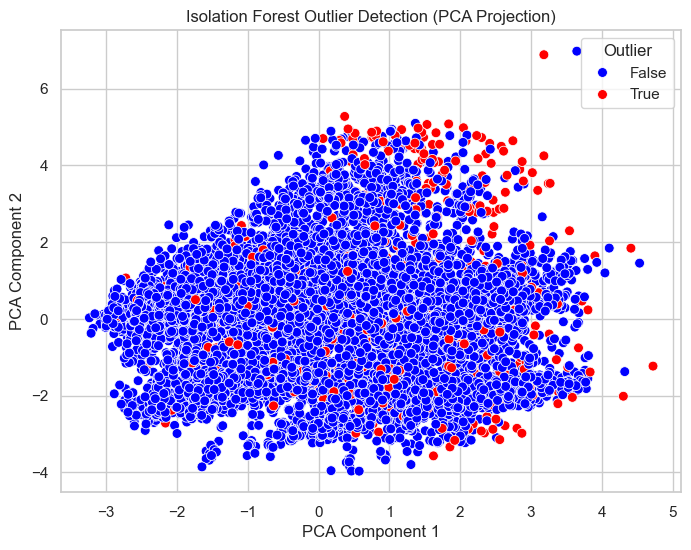

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Outlier'],
                palette={True: 'red', False: 'blue'}, s=50)
plt.title("Isolation Forest Outlier Detection (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Outlier")
plt.show()

## Analyze the Outliers

In [9]:
# Review the feature values of detected outliers
outlier_summary = data[data['Outlier']].describe()
outlier_summary

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,0.398593,0.051878,0.449595,0.359571,0.261181,-0.028860,0.032177,0.280494,0.031502,1.471775,0.663685
std,1.476905,0.221980,2.044761,0.480304,0.439672,1.110949,1.095934,1.630623,1.948456,2.566405,0.472871
min,-1.866218,0.000000,-0.775296,0.000000,0.000000,-1.740784,-1.060156,-0.554168,-2.993543,-0.363260,0.000000
25%,-0.858901,0.000000,-0.414551,0.000000,0.000000,-1.028226,-0.639544,-0.554168,-1.471144,0.073059,0.000000
50%,-0.019470,0.000000,-0.170695,0.000000,0.000000,-0.078148,-0.319763,-0.186785,-0.092973,0.509377,1.000000
75%,1.407562,0.000000,0.395304,1.000000,1.000000,0.990689,0.298192,0.180598,0.195482,1.818332,1.000000
max,4.345569,1.000000,24.703510,1.000000,1.000000,1.822008,8.299913,14.875916,9.890757,24.943204,1.000000
